# KNN


In [51]:
import pandas as pd
import numpy as np
import preprocessing as pp
import formatPredictions as fp
import metrics as m
import datasets as datasets
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.model_selection import GridSearchCV

# Importacion KNN
from sklearn.neighbors import KNeighborsClassifier

# Importacion preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [52]:
def normalizar_datos_estandar(X_train):
  standardScaler = StandardScaler() 
  standardScaler.fit(X_train)   
  return standardScaler

In [53]:
def normalizar_datos_minmax(X_train):
  minMaxScaler = MinMaxScaler()
  minMaxScaler.fit(X_train)   
  return minMaxScaler

# Analisis de hiperparametros
# Grid Search con Cross Validation

In [71]:
dfTrain = datasets.getDataTrain()
dfTrain_feature_engineering = pp.preprocessing_con_todos_los_features(dfTrain)
X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = pp.GetSeedForTrainSplit(), test_size=0.20)

standard_scaler_features_completos = normalizar_datos_estandar(X_train)
X_train = standard_scaler_features_completos.transform(X_train) 
X_test_normalized = standard_scaler_features_completos.transform(X_test)

In [72]:
knn_generico = KNeighborsClassifier()

In [73]:
n_neighbors = [int(x) for x in np.linspace(start = 5, stop = 30, num=6)]
weights= ['uniform', 'distance']
algorithm= ['auto', 'ball_tree', 'kd_tree', 'brute']
n_jobs= [-1]

In [74]:
param_grid  = {'n_neighbors': n_neighbors,
               'weights': weights,
               'algorithm': algorithm,
               'n_jobs': n_jobs}

In [75]:
pprint(param_grid)

{'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'n_jobs': [-1],
 'n_neighbors': [5, 10, 15, 20, 25, 30],
 'weights': ['uniform', 'distance']}


In [76]:
grid_search = GridSearchCV(estimator = knn_generico, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [77]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.8min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored

# Entrenamiento con todos los features y normalizacion estandar

In [4]:
dfTrain = datasets.getDataTrain()

dfTrain_feature_engineering = pp.preprocessing_con_todos_los_features(dfTrain)

X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = pp.GetSeedForTrainSplit(), test_size=0.20)

In [5]:
standard_scaler_features_completos = normalizar_datos_estandar(X_train)
X_train = standard_scaler_features_completos.transform(X_train) 
X_test_normalized = standard_scaler_features_completos.transform(X_test)

In [6]:
knn_features_completos_normalizacion_estandar = KNeighborsClassifier(n_neighbors=8)
knn_features_completos_normalizacion_estandar.fit(X_train, y_train)
y_pred = knn_features_completos_normalizacion_estandar.predict(X_test_normalized)

# Metricas

Accuracy: 0.8320282511899278

Precision: 0.6987124463519313

Recall: 0.9291767554479419

F1 Score: 0.5980896399706099

Matriz de confusion: 
[[4605  351]
 [ 743  814]]

AUC-ROC: 



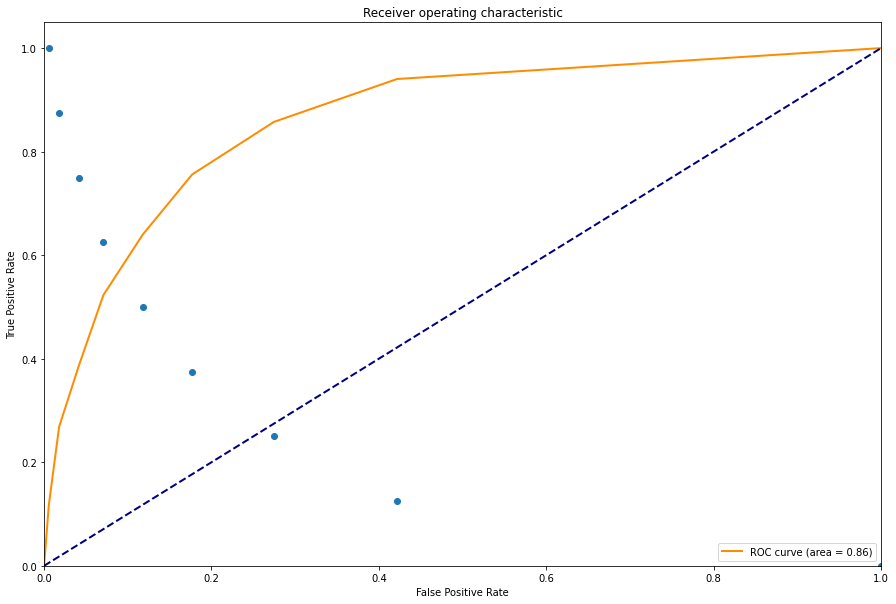

0.8643331710834404

In [7]:
m.getMetrics(y_test, y_pred, knn_features_completos_normalizacion_estandar.predict_proba(X_test_normalized)[:,1])

# Entrenamiento con todos los features y normalizacion MinMax

In [8]:
dfTrain = datasets.getDataTrain()

dfTrain_feature_engineering = pp.preprocessing_con_todos_los_features(dfTrain)

X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = pp.GetSeedForTrainSplit(), test_size=0.20)

In [9]:
minmax_scaler_features_completos = normalizar_datos_minmax(X_train)
X_train = minmax_scaler_features_completos.transform(X_train) 
X_test_normalized = minmax_scaler_features_completos.transform(X_test)

In [10]:
knn_features_completos_normalizacion_minmax = KNeighborsClassifier(n_neighbors=8)
knn_features_completos_normalizacion_minmax.fit(X_train, y_train)
y_pred = knn_features_completos_normalizacion_minmax.predict(X_test_normalized)

# Metricas

Accuracy: 0.8355596499309074

Precision: 0.7227387996618766

Recall: 0.933265513733469

F1 Score: 0.6148867313915858

Matriz de confusion: 
[[4587  328]
 [ 743  855]]

AUC-ROC: 



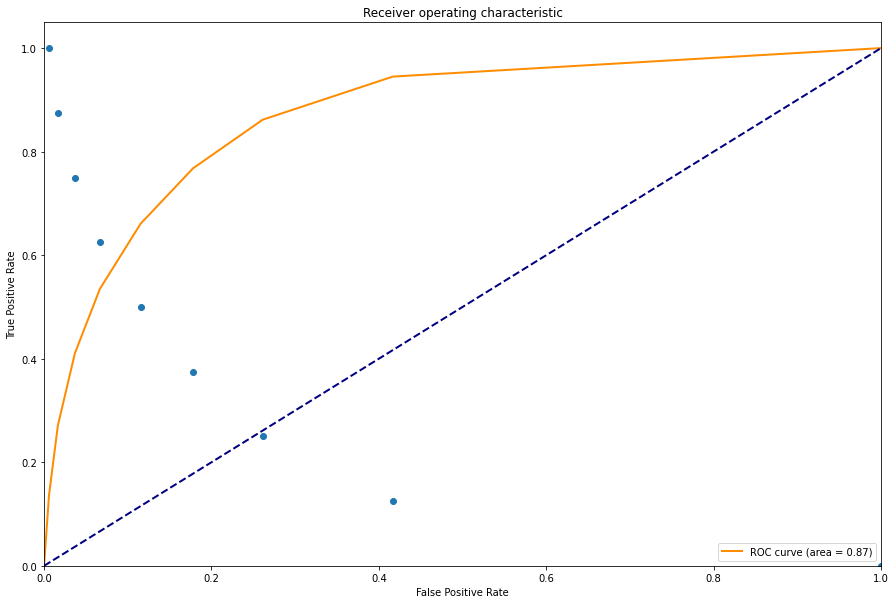

0.8729390884078139

In [11]:
m.getMetrics(y_test, y_pred, knn_features_completos_normalizacion_minmax.predict_proba(X_test_normalized)[:,1])

# Entrenamiento con seleccion y normalizacion estandar

In [12]:
dfTrain = datasets.getDataTrain()

dfTrain_feature_engineering = pp.feature_engineering_con_seleccion(dfTrain)

X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = pp.GetSeedForTrainSplit(), test_size=0.20)

In [13]:
standard_scaler_features_seleccion = normalizar_datos_estandar(X_train)
X_train = standard_scaler_features_seleccion.transform(X_train) 
X_test_normalized = standard_scaler_features_seleccion.transform(X_test)

In [14]:
knn_features_seleccion_normalizacion_estandar = KNeighborsClassifier(n_neighbors=8)
knn_features_seleccion_normalizacion_estandar.fit(X_train, y_train)
y_pred = knn_features_seleccion_normalizacion_estandar.predict(X_test_normalized)

# Metricas

Accuracy: 0.7741440196530017

Precision: 0.5104302477183833

Recall: 0.8500998003992016

F1 Score: 0.5156404346394468

Matriz de confusion: 
[[4259  751]
 [ 720  783]]

AUC-ROC: 



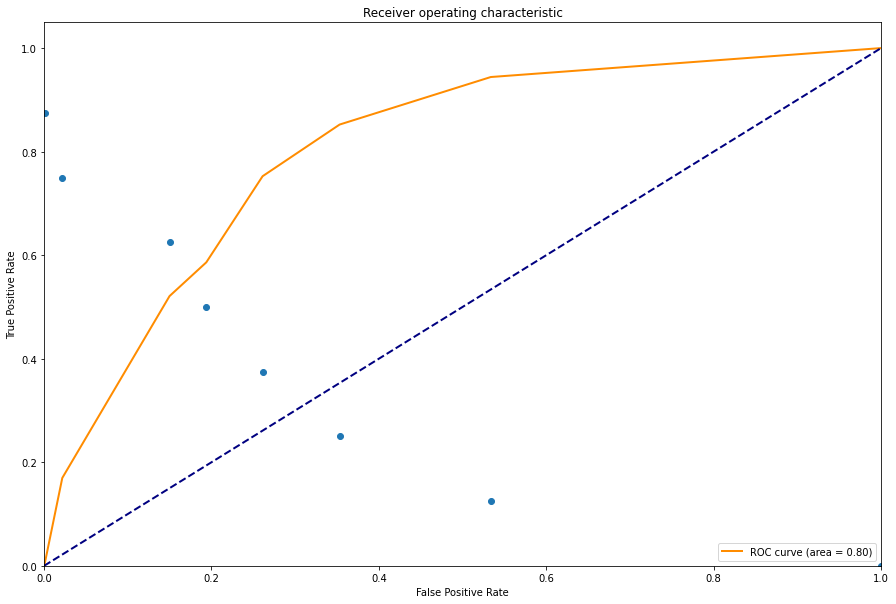

0.8047275376060918

In [15]:
m.getMetrics(y_test, y_pred, knn_features_seleccion_normalizacion_estandar.predict_proba(X_test_normalized)[:,1])

# Entrenamiento con seleccion y normalizacion MinMax

In [16]:
dfTrain = datasets.getDataTrain()

dfTrain_feature_engineering = pp.feature_engineering_con_seleccion(dfTrain)

X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = pp.GetSeedForTrainSplit(), test_size=0.20)

In [17]:
minmax_scaler_features_completos = normalizar_datos_minmax(X_train)
X_train = minmax_scaler_features_completos.transform(X_train) 
X_test_normalized = minmax_scaler_features_completos.transform(X_test)

In [18]:
knn_features_seleccion_normalizacion_minmax = KNeighborsClassifier(n_neighbors=8)
knn_features_seleccion_normalizacion_minmax.fit(X_train, y_train)
y_pred = knn_features_seleccion_normalizacion_minmax.predict(X_test_normalized)

# Metricas

Accuracy: 0.7839705204974666

Precision: 0.7007575757575758

Recall: 0.9677155700858193

F1 Score: 0.344666977177457

Matriz de confusion: 
[[4736  158]
 [1249  370]]

AUC-ROC: 



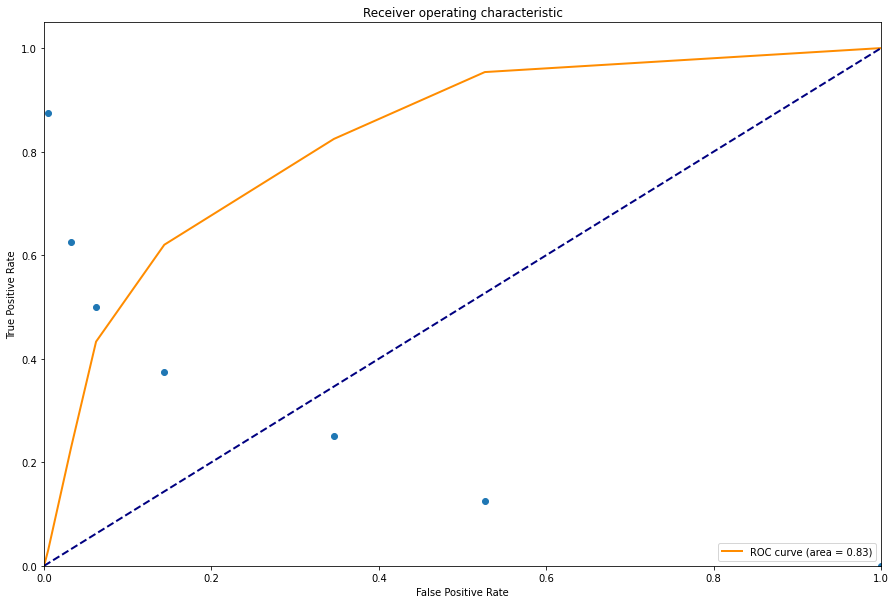

0.825544786029609

In [19]:
m.getMetrics(y_test, y_pred, knn_features_seleccion_normalizacion_minmax.predict_proba(X_test_normalized)[:,1])

# Prediccion del set objectivo usando entrenamiento con todos los features y normalizacion estandar

In [20]:
dfTrain = datasets.getDataTrain()
dfTrain_feature_engineering = pp.preprocessing_con_todos_los_features(dfTrain)
X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = pp.GetSeedForTrainSplit(), test_size=0.20)
standard_scaler_features_completos = normalizar_datos_estandar(X_train)
X_train = standard_scaler_features_completos.transform(X_train) 

In [21]:
# Obtengo el set para predecir
dfObjetivo = datasets.getDataHoldout()

# Elimino columnas "representatividad_poblacional" y "id"
dfObjetivo.drop(columns = ['representatividad_poblacional', 'id'], inplace = True)

dfObjetivo_feature_engineering = pp.preprocessing_KNN_con_todos_los_features(dfObjetivo)
X_normalized = standard_scaler_features_completos.transform(dfObjetivo_feature_engineering)

predicciones = knn_features_completos_normalizacion_minmax.predict(X_normalized)
predicciones

array([0, 0, 0, ..., 1, 0, 1])

In [22]:
fp.exportPredictions(fp.formatPredictions(predicciones), "KNN")